In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Les coordonnees de la matrice
data.shape

(891, 12)

In [4]:
#Les 10 premieres lignes
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#On supprime les elements qui ne seront pas utiles dans notre analyse

data_utile = data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [6]:
#La nouvelle liste après suppression

data_utile

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
...,...,...,...,...,...
886,887,0,2,male,27.0
887,888,1,1,female,19.0
888,889,0,3,female,NaN
889,890,1,1,male,26.0


In [7]:
data_utile.shape

(891, 5)

On remarque ici l'absence des autres colonnes et la reduction du nombre des colonnes dans la matrice qui est de 5 au lieu de 12 du depart

In [8]:
#Les statistiques de nos colonnes

data_utile.describe()

,PassengerId,Survived,Pclass,Age
count,891.000000,891.000000,891.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118
std,257.353842,0.486592,0.836071,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000
50%,446.000000,0.000000,3.000000,28.000000
75%,668.500000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


sur la statistique on remarque l'incoherence des données au niveau de l'age 714.... qui est inferieure aux autres

In [9]:
#On elemine les lignes qui contiennent les données manquantes

data_finale = data_utile.dropna(axis=0)

In [10]:
#La nouvelle liste reduite

data_finale

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
...,...,...,...,...,...
885,886,0,3,female,39.0
886,887,0,2,male,27.0
887,888,1,1,female,19.0
889,890,1,1,male,26.0


In [11]:
data_finale.shape

(714, 5)

In [12]:
data_finale.describe()

,PassengerId,Survived,Pclass,Age
count,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118
std,259.119524,0.491460,0.838250,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,222.250000,0.000000,1.000000,20.125000
50%,445.000000,0.000000,2.000000,28.000000
75%,677.750000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


On remarque belle et bien la reduction des lignes qui est maintenant de 714 au lieu de 891 du départ et  l'uniformité des valeurs sur la  premiere ligne qui represente le nombre des données enregistrées.

# LE NOMBRE DES PERSONNES SUR CHAQUE CLASSE DU BATEAU

In [13]:
# Recuperer les nombres des personnes sur chaque classe du bateau et le graphique representatif de cela

data_finale['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

<Axes: >

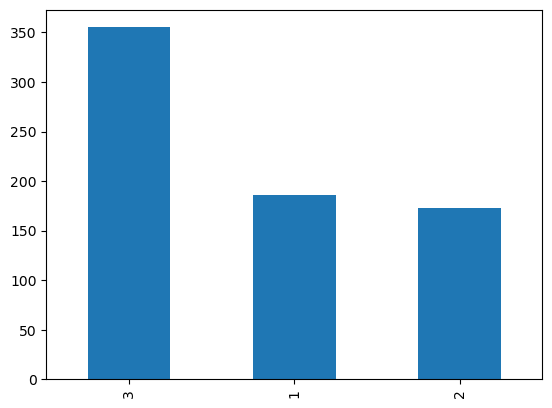

In [107]:
data_finale['Pclass'].value_counts().plot.bar()

<Axes: ylabel='Pclass'>

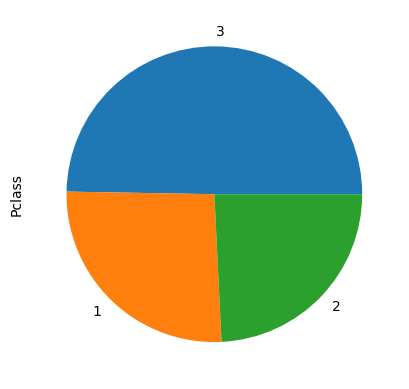

In [14]:
data_finale['Pclass'].value_counts().plot.pie()

In [108]:
# Les types des données

data_finale.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
dtype: object

<Axes: >

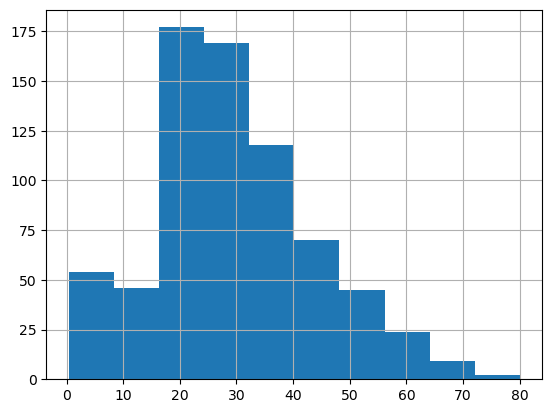

In [109]:
# La statistique par a l'age des passagers

data_finale['Age'].hist()

On remarque sur le graphique que la majorité des passagers étaient des jeunes de 17 à 23 ans

In [110]:
#Les chiffres

data_finale.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age
Sex    Pclass                                  
female 1        478.282353  0.964706  34.611765
       2        442.905405  0.918919  28.722973
       3        406.500000  0.460784  21.750000
male   1        451.910891  0.396040  41.281386
       2        450.333333  0.151515  30.740707
       3        455.217391  0.150198  26.507589

Constat : on remarque que dans la 1ere classe 96% des femmes dont l'age moyen etait de 35 ont survecues au catastrophe. Et 40% des hommes dont l'age moyen etait de 22 ans ont survecus

In [111]:
# Les mineurs avec l'age inferieur à 18 ans

data_mineur = data_finale[data_reduit['Age'] < 18]
data_mineur

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
...,...,...,...,...,...
885,886,0,3,female,39.0
886,887,0,2,male,27.0
887,888,1,1,female,19.0
889,890,1,1,male,26.0


In [112]:
data_mineur.shape

(714, 5)

On a 113 passagers qui etait des mineurs de moins de 18 ans

In [113]:
# Les mineurs par rapport aux sex et à leurs classes

data_mineur.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age
Sex    Pclass                                  
female 1        478.282353  0.964706  34.611765
       2        442.905405  0.918919  28.722973
       3        406.500000  0.460784  21.750000
male   1        451.910891  0.396040  41.281386
       2        450.333333  0.151515  30.740707
       3        455.217391  0.150198  26.507589

Constat : on remarque que dans la 1ere classe 88% des femmes dont l'age moyen etait de 14 ans ont survecues au catastrophe. Et 1% des hommes dont l'age moyen etait de 8 ans ont survecus

In [114]:
data_mineur.groupby(['Sex', 'Age']).value_counts()

Sex     Age    PassengerId  Survived  Pclass
female  0.75   470          1         3         1
               645          1         3         1
        1.00   173          1         3         1
               382          1         3         1
        2.00   120          0         3         1
                                               ..
male    70.50  117          0         3         1
        71.00  97           0         1         1
               494          0         1         1
        74.00  852          0         3         1
        80.00  631          1         1         1
Length: 714, dtype: int64

In [115]:
#L'indexing


data_finale.iloc[0:2, 0:2]

,PassengerId,Survived
0,1,0
1,2,1


In [116]:
data_finale.loc[0:2, ['Sex', 'Age']]

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0


In [117]:
# On crée une copie pour ne pas perdre nos données en cas d'érreur

data_finale

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
...,...,...,...,...,...
885,886,0,3,female,39.0
886,887,0,2,male,27.0
887,888,1,1,female,19.0
889,890,1,1,male,26.0


In [118]:
data_finale.describe()

,PassengerId,Survived,Pclass,Age
count,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118
std,259.119524,0.491460,0.838250,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,222.250000,0.000000,1.000000,20.125000
50%,445.000000,0.000000,2.000000,28.000000
75%,677.750000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


In [119]:
data_finale

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
...,...,...,...,...,...
885,886,0,3,female,39.0
886,887,0,2,male,27.0
887,888,1,1,female,19.0
889,890,1,1,male,26.0


In [120]:
# On recupère les intervales d'ages en les representant par des chiffres pour mieux trier nos données


data_finale.loc[data_finale['Age'] < 18, 'Age'] = 0
data_finale.loc[(data_finale['Age'] >= 18) & (data_finale['Age'] <= 30), 'Age'] = 1
data_finale.loc[(data_finale['Age'] > 30) & (data_finale['Age'] <= 40), 'Age'] = 2
data_finale.loc[data_finale['Age'] > 40, 'Age'] = 3

Ne pas actualiser de fois champs ou y'a des operations des inegalités car les données sont manipuler au temps reels dans votre fichier data_suite. 

In [121]:
# On reaffiche notre nouvelle base de données

data_finale

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,1.0
1,2,1,1,female,2.0
2,3,1,3,female,1.0
3,4,1,1,female,2.0
4,5,0,3,male,2.0
...,...,...,...,...,...
885,886,0,3,female,2.0
886,887,0,2,male,1.0
887,888,1,1,female,1.0
889,890,1,1,male,1.0


In [122]:
data_finale['Age'].value_counts()

1.0    296
2.0    155
3.0    150
0.0    113
Name: Age, dtype: int64

Interpretation: 296 étaient  des jeunes de 18 ans à 30 ans
                115 étaient agés de 31 à 40 ans
                150 étaient agés de plus de 40 ans
                113 passagers étaient des mineurs de mois de 18 ans

<Axes: >

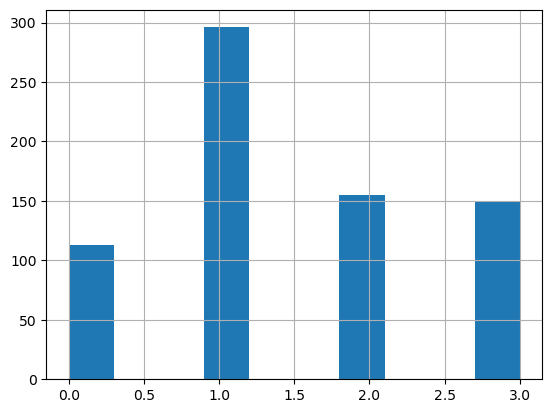

In [127]:
data_finale['Age'].hist()

Conclusion: Les survivant du titanic étaient plus les jeunes de 18 ans à 30 ans.

# BONNE CHANCE DANS VOTRE APPRENTISSAGE